## Heart Disease Capstone Project

## 1. Import Packages


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

## 2. Read the Data

In [2]:
data = pd.read_csv("D:\kaggle_project\heart disease project\heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## 3. Understand and Prepare the Data

## 3.1 Data Types and Dimensions

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
data.shape

(303, 14)

## 4. Missing Data Treatment

In [6]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<AxesSubplot: >

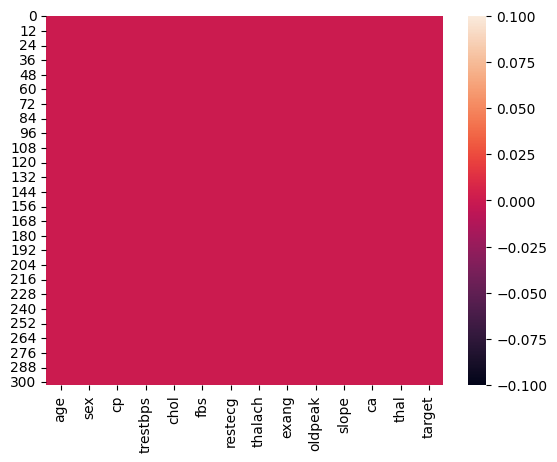

In [7]:
sns.heatmap(data.isnull())

Check Duplicate Value

In [8]:
data_dup = data.duplicated().any()
data_dup

True

In [9]:
data = data.drop_duplicates()
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [10]:
data_dup = data.duplicated().any()
data_dup

False

In [11]:
data.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

## 5. Exploratory data analysis

In [12]:
data.target.value_counts()

1    164
0    138
Name: target, dtype: int64

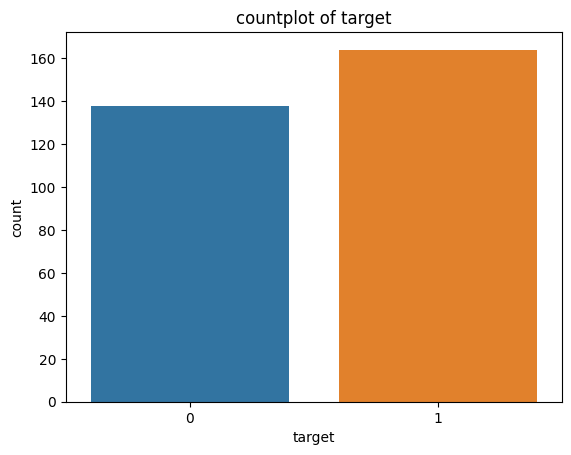

In [13]:
sns.countplot(data=data, x='target')
plt.title('countplot of target')
plt.show()

## 5.1 splitting the data

## Separating categorical and numerical variable

In [14]:
cat_val=[]
cont_val=[]

for column in data.columns:
    if data[column].nunique()<=10:
        cat_val.append(column)
    else:
        cont_val.append(column)

In [15]:
cat_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

<AxesSubplot: xlabel='sex', ylabel='count'>

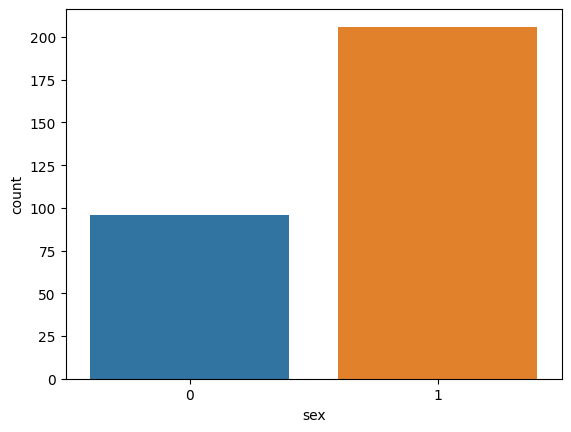

In [18]:
data['sex'].unique()
sns.countplot(data=data, x='sex')

<AxesSubplot: xlabel='cp', ylabel='count'>

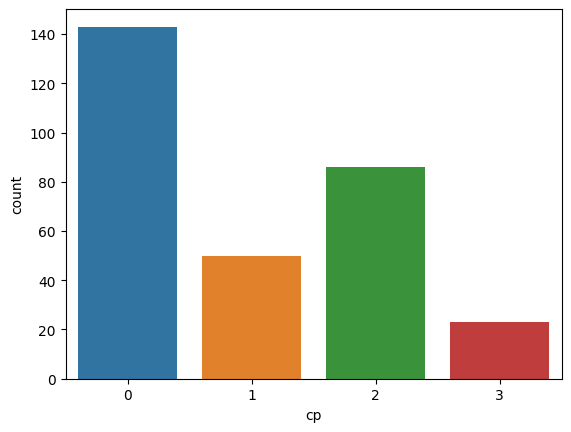

In [19]:
data['cp'].unique()
#sns.countplot(data.cp)
sns.countplot(data=data, x='cp')

<AxesSubplot: xlabel='fbs', ylabel='count'>

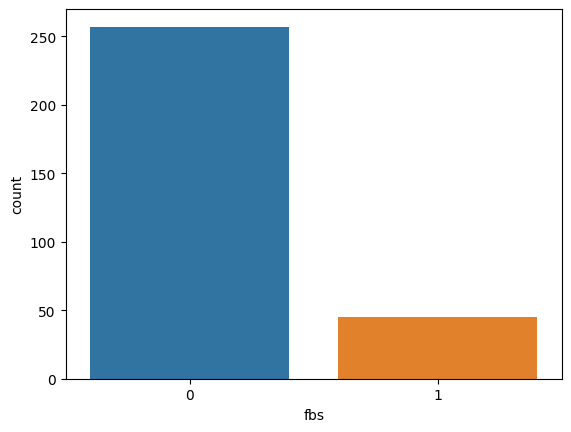

In [20]:
data['fbs'].unique()
sns.countplot(data=data,x='fbs')

<AxesSubplot: xlabel='restecg', ylabel='count'>

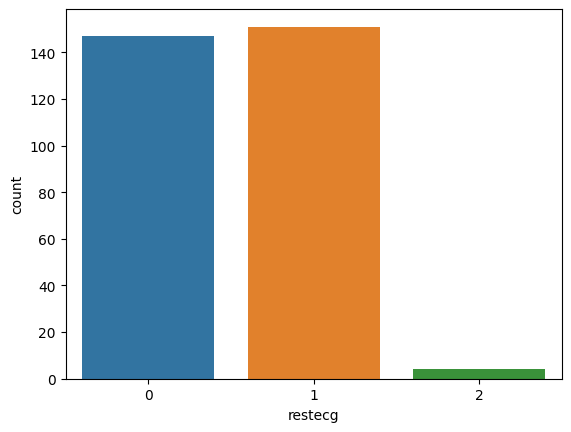

In [21]:
data['restecg'].unique()
sns.countplot(data=data,x='restecg')

<AxesSubplot: xlabel='exang', ylabel='count'>

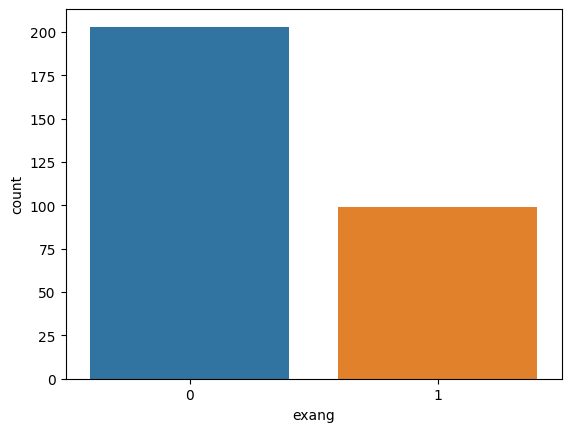

In [22]:
data['exang'].unique()
sns.countplot(data=data,x='exang')

<AxesSubplot: xlabel='slope', ylabel='count'>

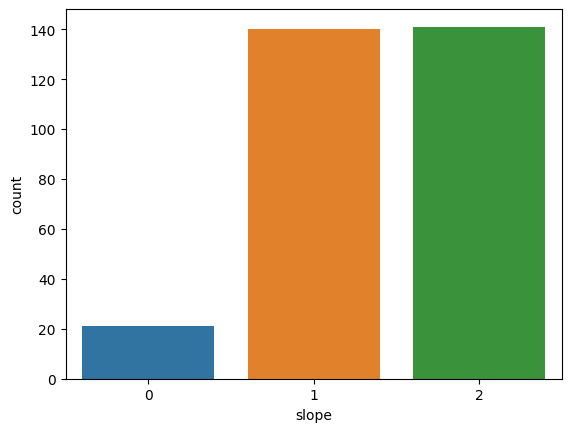

In [23]:
data['slope'].unique()
sns.countplot(data=data,x='slope')

<AxesSubplot: xlabel='ca', ylabel='count'>

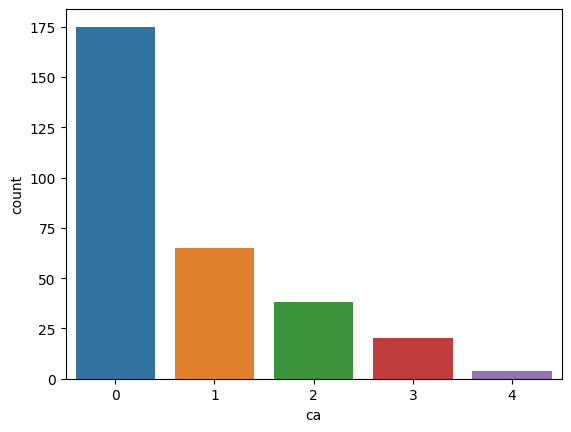

In [24]:
data['ca'].unique()
sns.countplot(data=data,x='ca')

<AxesSubplot: xlabel='thal', ylabel='count'>

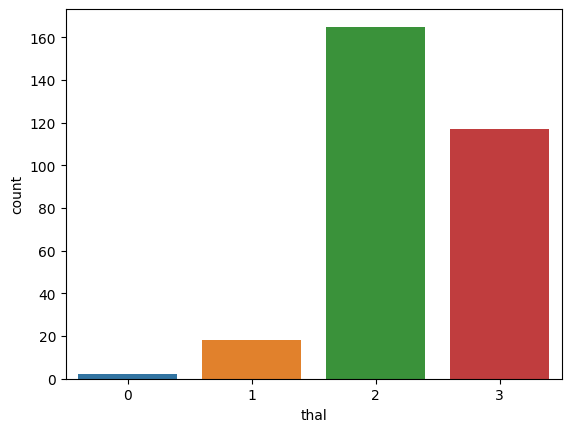

In [25]:
data['thal'].unique()
sns.countplot(data=data,x='thal')

Continues variable

In [26]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

## Outliers

In [27]:
y=data

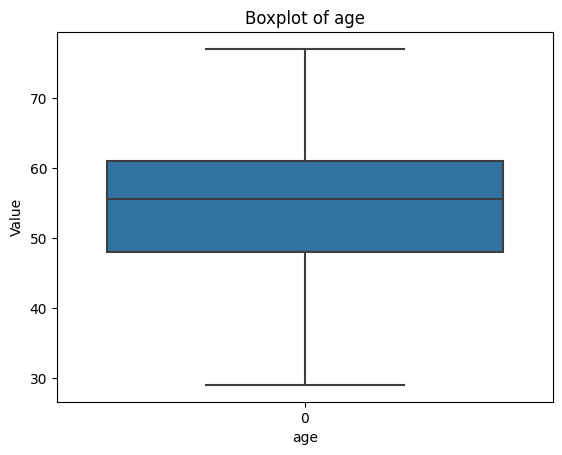

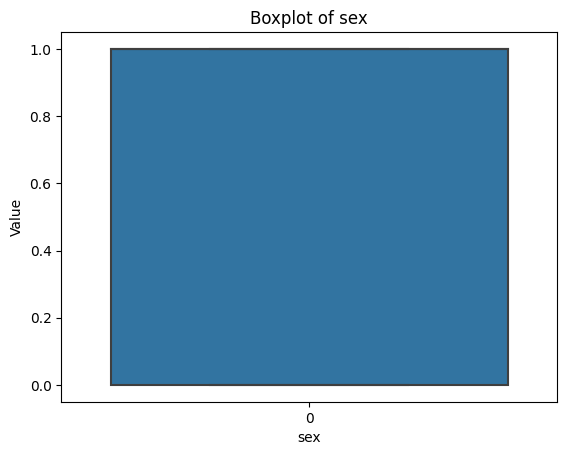

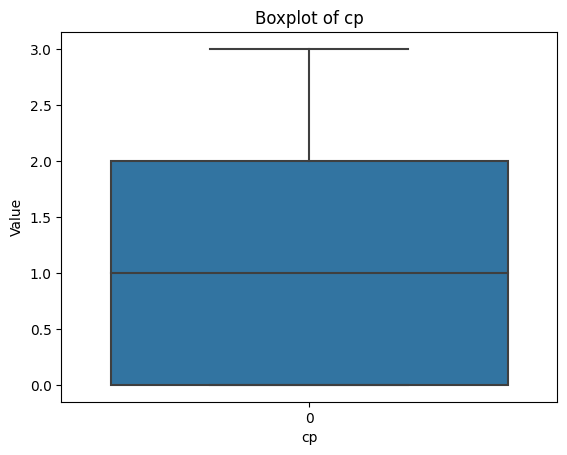

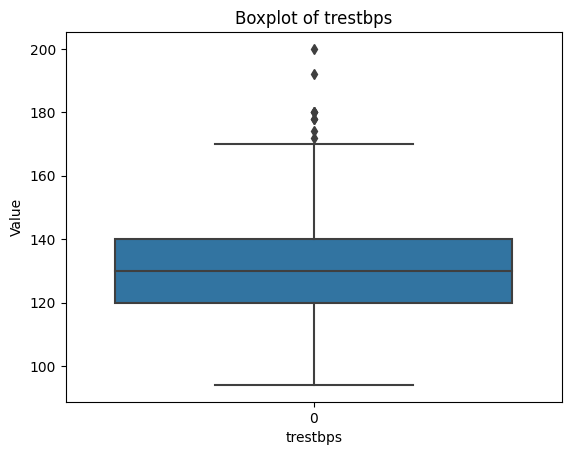

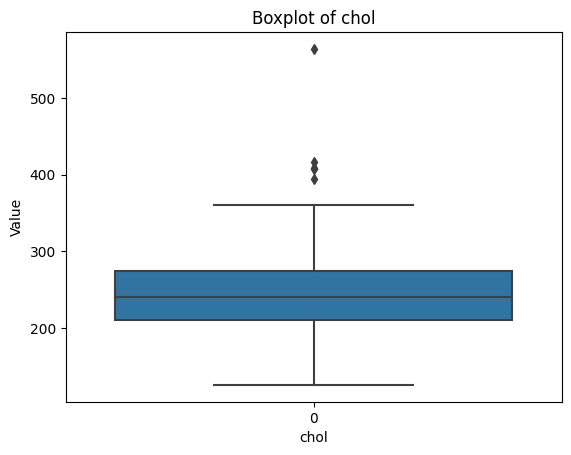

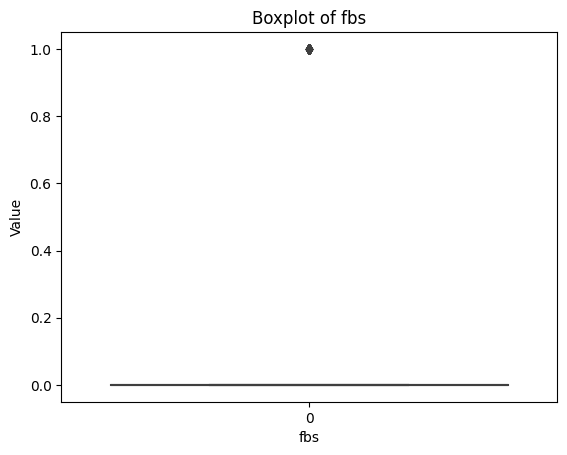

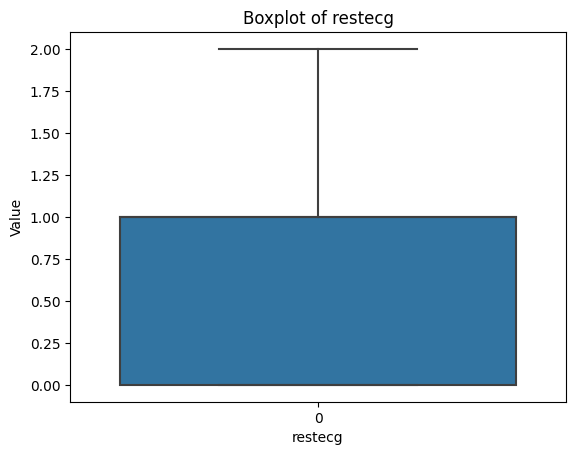

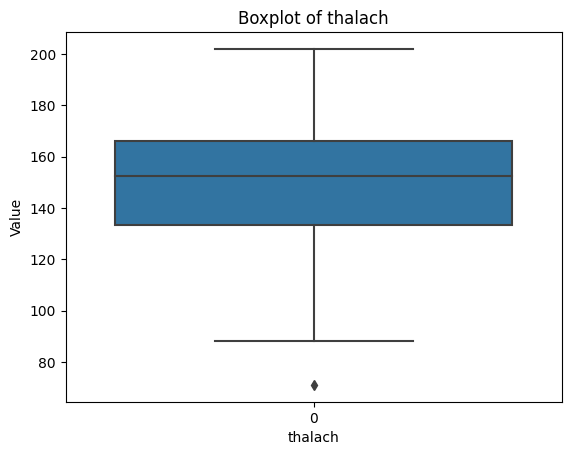

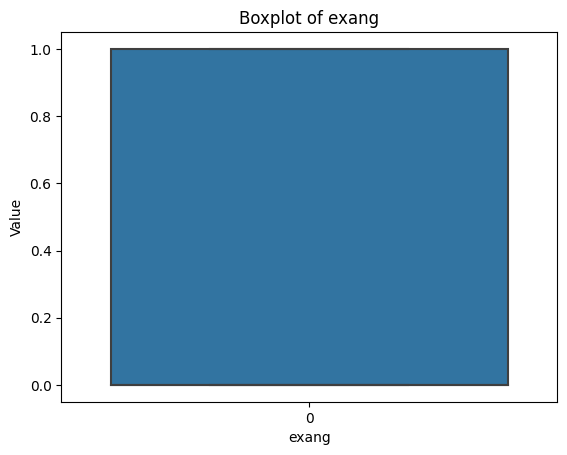

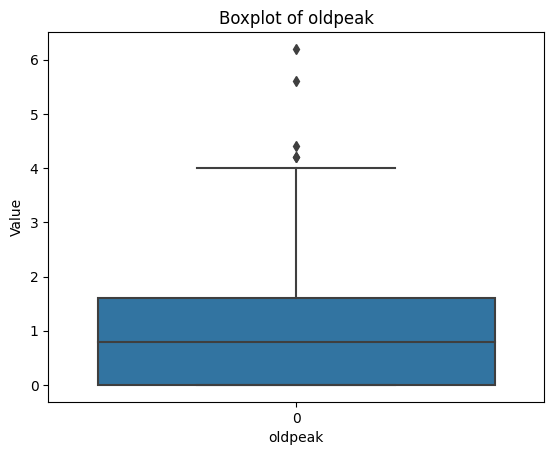

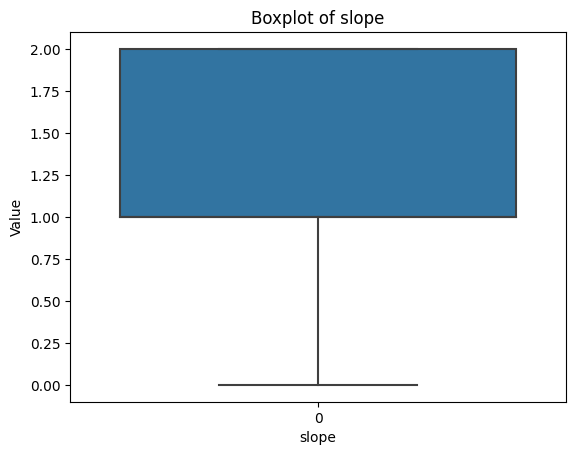

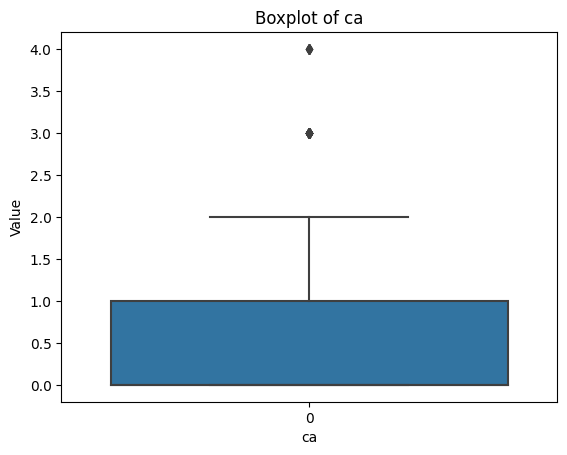

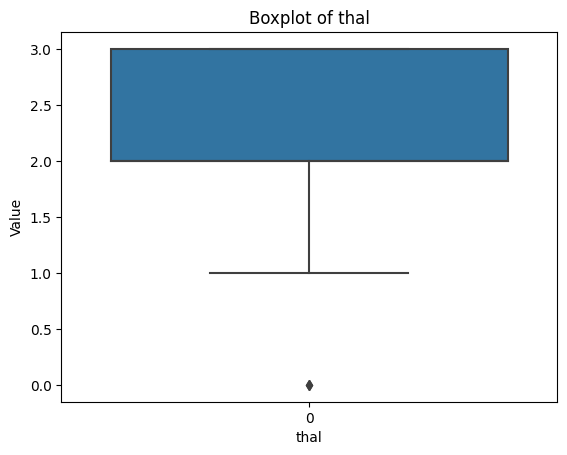

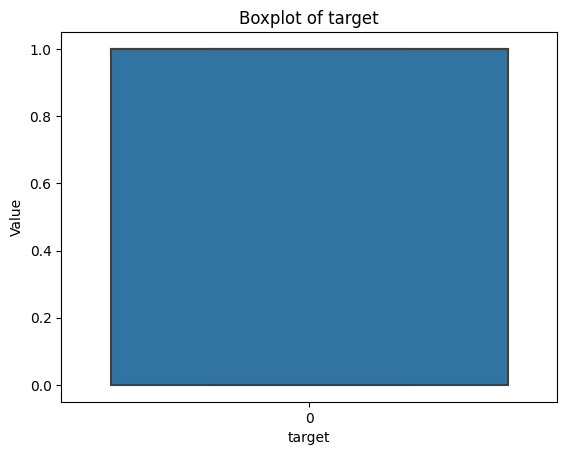

In [28]:
for column in y.columns:
    sns.boxplot(data=y[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.ylabel('Value')
    plt.show()

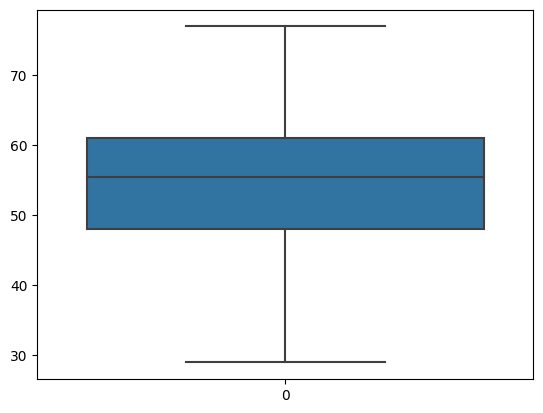

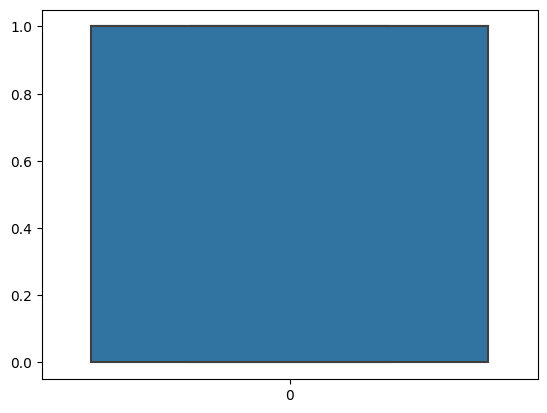

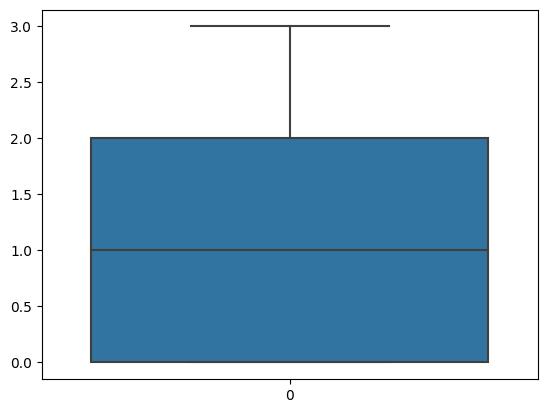

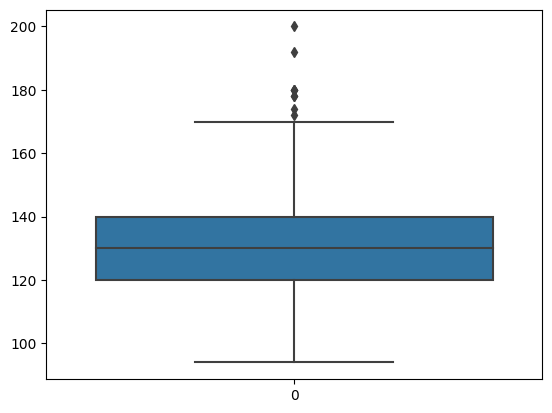

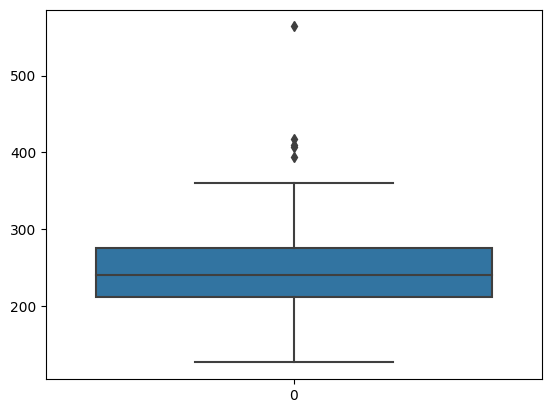

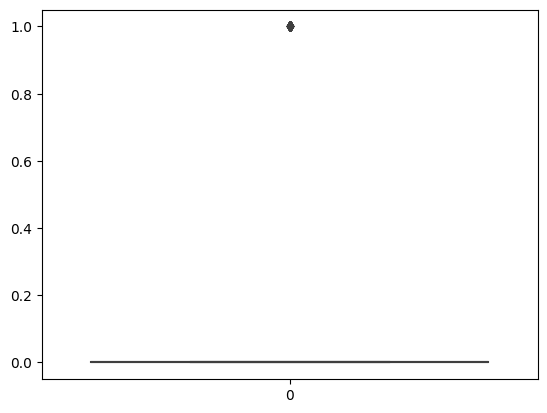

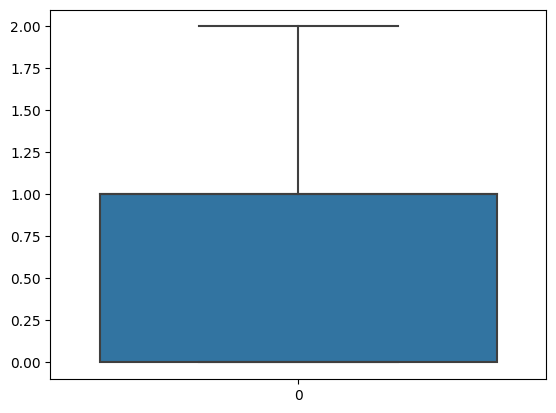

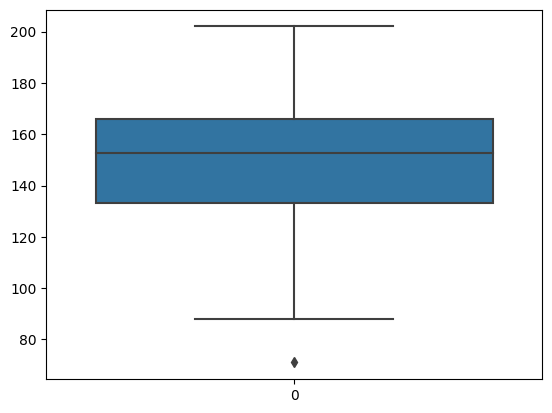

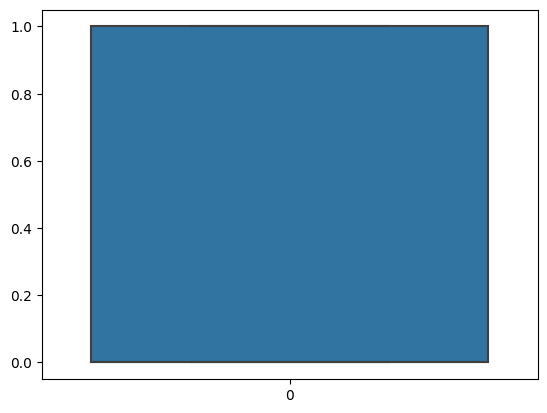

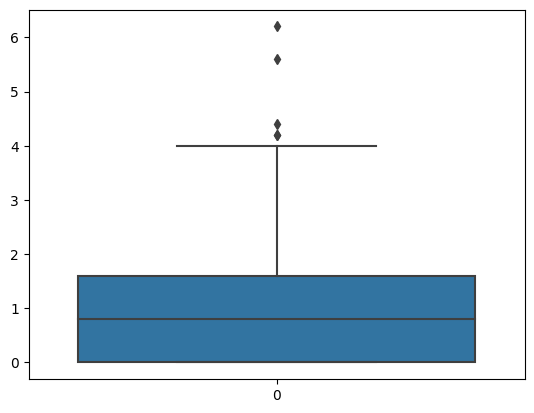

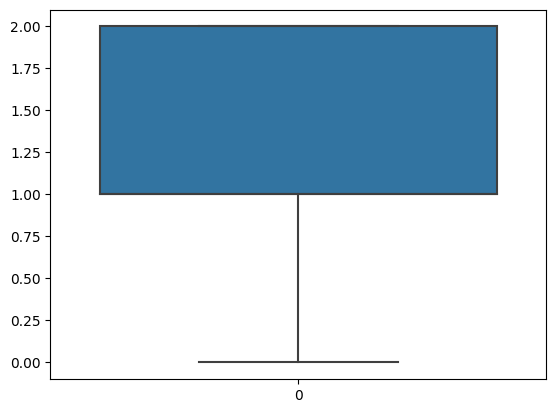

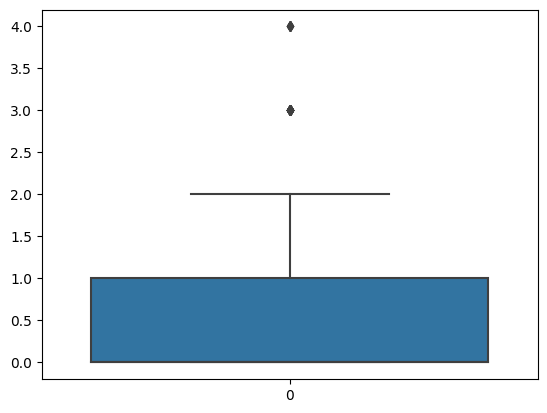

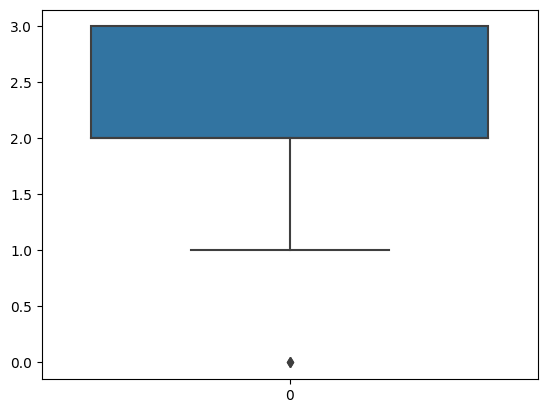

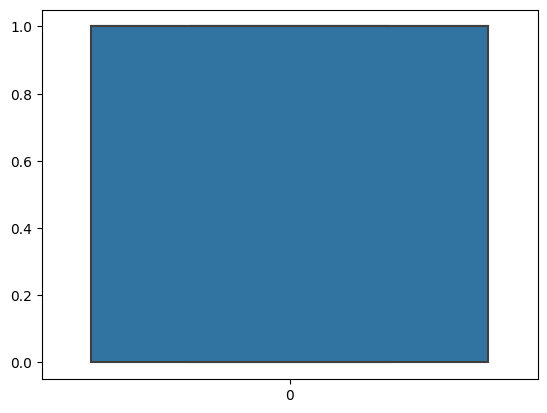

In [42]:
for i in y.columns:
    sns.boxplot(data[i])
    plt.show()

In [43]:
#numpy percentile method to calculate the values of Q1 and Q3
for i in y.columns:
    q75,q25 = np.percentile(data.loc[:,i],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    data.loc[data[i] <min,i] = np.nan
    data.loc[data[i] > max,i] = np.nan

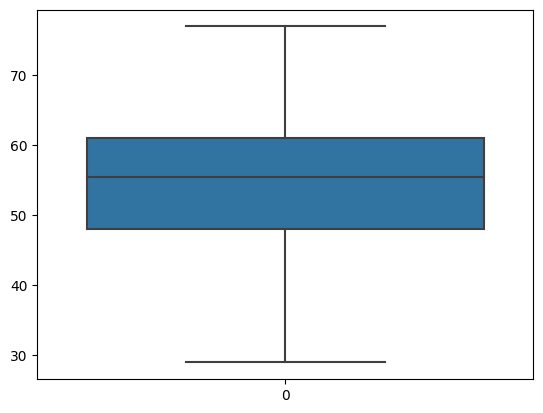

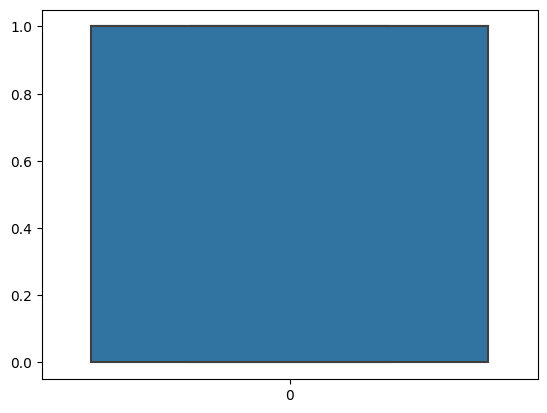

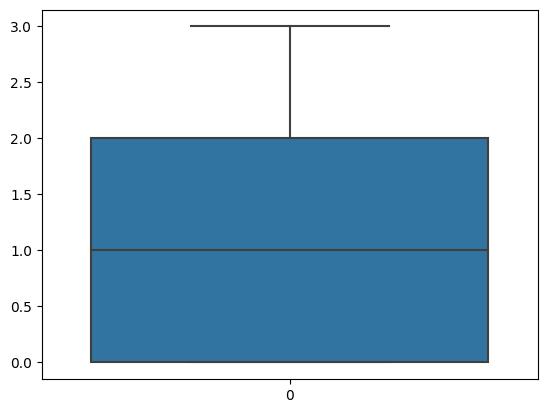

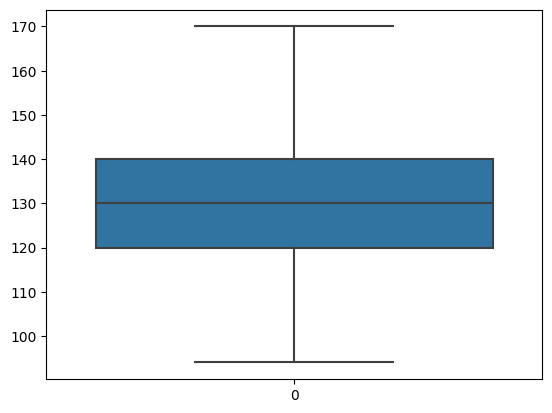

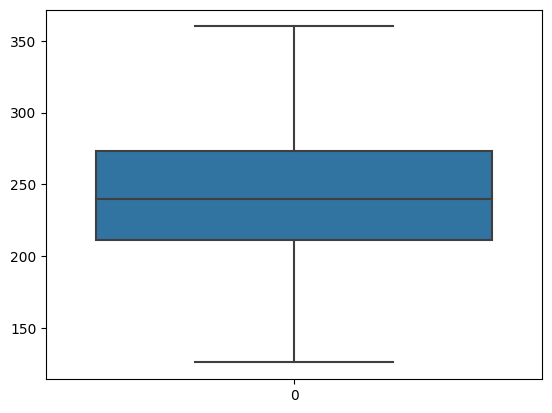

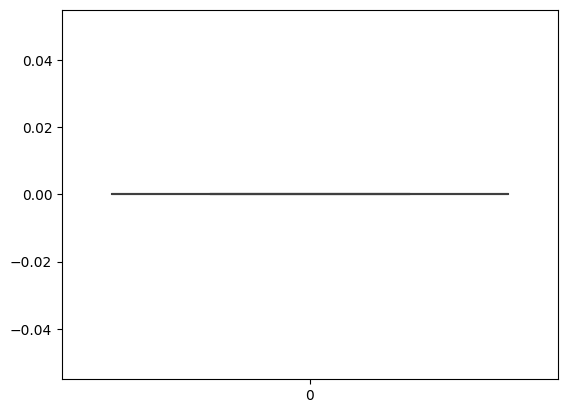

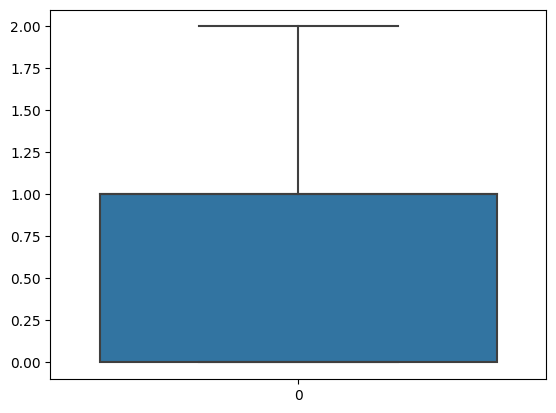

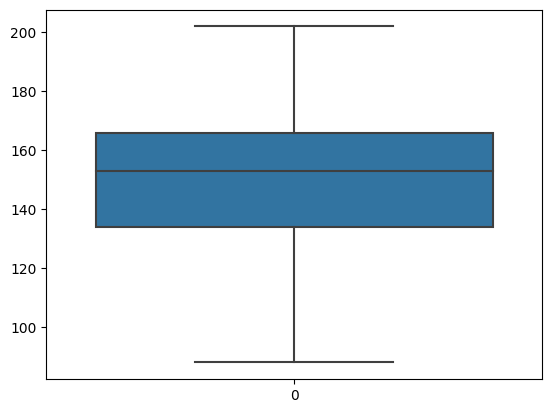

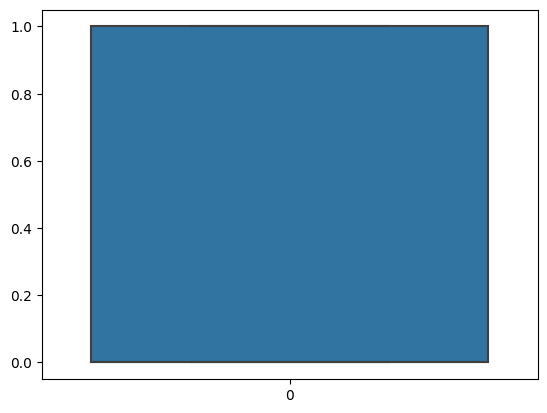

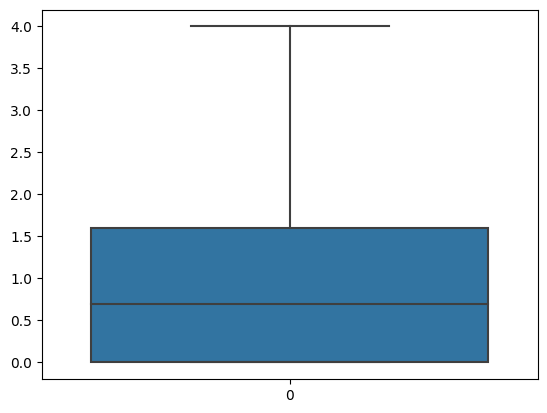

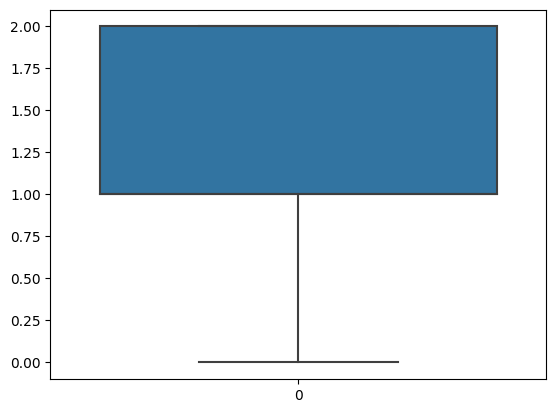

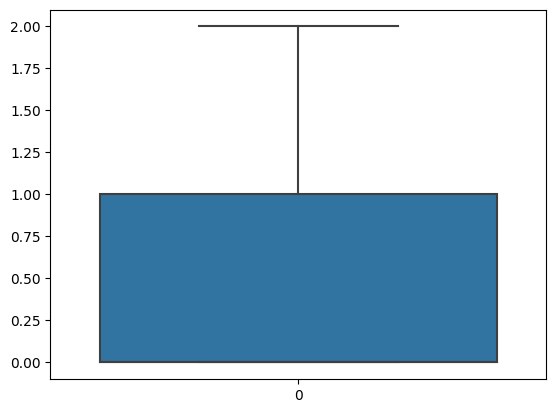

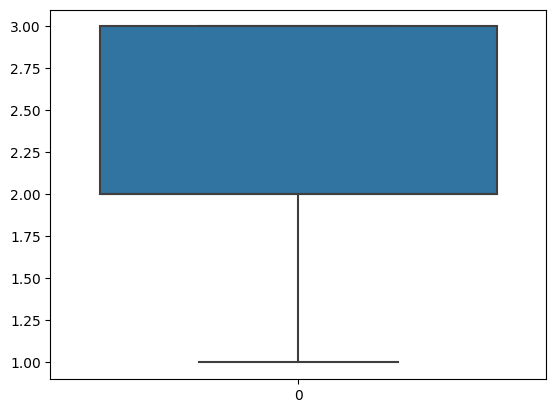

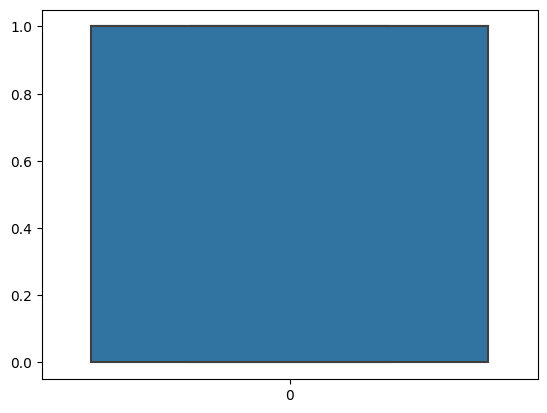

In [44]:
for i in y.columns:
    sns.boxplot(data[i])
    plt.show()

In [29]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [30]:
data=data.dropna(axis = 0)

In [31]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Heatmap

<AxesSubplot: >

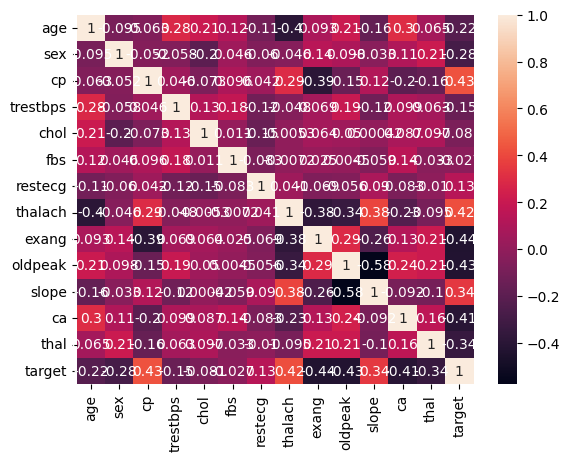

In [32]:
sns.heatmap(data.corr(),annot=True)

## Correlation matrix

In [33]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


## Splitting tha data

# Splitting the data into test and train

In [34]:
# Getting features and target
X = data.drop(["target"], axis=1)
y = data["target"]

In [35]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

## Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
logmodel = LogisticRegression()
logmodel=logmodel.fit(X_train,y_train)

In [39]:
logmodel

LogisticRegression()

In [40]:
y_predlog = logmodel.predict(X_test)
y_predlog

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1], dtype=int64)

In [41]:
from sklearn.metrics import confusion_matrix

In [42]:
from sklearn.metrics import accuracy_score
accuracy=(accuracy_score(y_test,y_predlog)*100)
accuracy

85.24590163934425

In [43]:
from sklearn.metrics import classification_report

## Evaluation

In [44]:
print(classification_report(y_test,y_predlog))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



## Decision Tree

In [45]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [47]:
y_predt = dt.predict(X_test)

In [50]:
accuracy=(accuracy_score(y_test,y_predt))
accuracy

0.7868852459016393

## Evaluation

In [51]:
print(classification_report(y_test,y_predt))

              precision    recall  f1-score   support

           0       0.72      0.90      0.80        29
           1       0.88      0.69      0.77        32

    accuracy                           0.79        61
   macro avg       0.80      0.79      0.79        61
weighted avg       0.80      0.79      0.79        61



## ROC curve

In [52]:
from sklearn.metrics import roc_curve, auc, roc_auc_score 

In [53]:
y_prob = dt.predict_proba(X_test)[:,1]
y_prob

array([0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 0.])

In [54]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)

In [55]:
true_positive_rate

array([0.    , 0.6875, 1.    ])

In [56]:
thresholds

array([2., 1., 0.])

In [57]:
false_positive_rate

array([0.        , 0.10344828, 1.        ])

In [58]:
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7920258620689655

Text(0.5, 0, 'False Positive Rate')

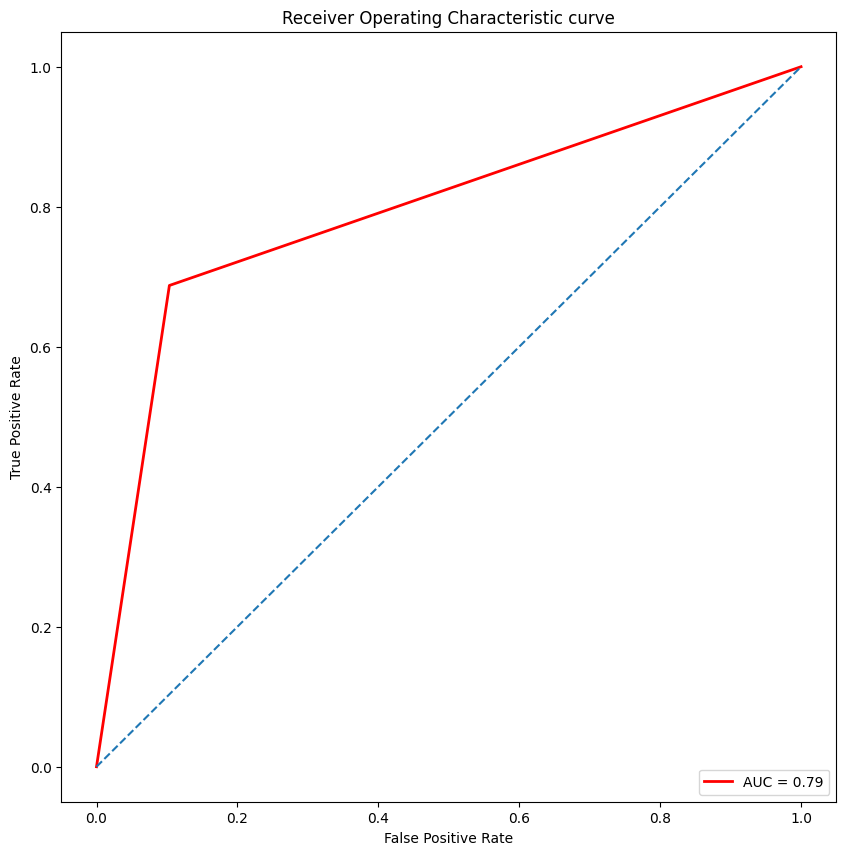

In [59]:
plt.figure(figsize=(10,10))
lw=2
plt.title('Receiver Operating Characteristic curve')
plt.plot(false_positive_rate,true_positive_rate, color='red',lw=lw,label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

## Random forest

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score 

In [61]:
rf=RandomForestClassifier(n_estimators=100,bootstrap=100,max_features='sqrt')

In [62]:
rffit=rf.fit(X_train,y_train)
rffit

RandomForestClassifier(bootstrap=100)

In [63]:
y_predRF=rffit.predict(X_test)

In [64]:
y_predRF

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [65]:
accuracy=(accuracy_score(y_test,y_predRF))
accuracy

0.8524590163934426

## Evaluation

In [66]:
print(classification_report(y_test,y_predRF))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85        29
           1       0.90      0.81      0.85        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



## Conclusion

In [67]:
accuracy=(accuracy_score(y_test,y_predlog))
accuracy

0.8524590163934426

In [68]:
accuracy=(accuracy_score(y_test,y_predt))
accuracy

0.7868852459016393

In [69]:
accuracy=(accuracy_score(y_test,y_predRF))
accuracy

0.8524590163934426

## Optimum model is Logistic regression with an Accuracy 85.24%